# Data Description

## Variables no utilizadas

### Id (primera columna sin nombre)

Identificación del registro en el dataset.

- Tipo de variable: numérica.
- No se utilizará como variable porque no aporta información sobre el diamante en sí, y facilitaría el sobreentrenamiento de los modelos que utilicemos.

---

## Variables de entrada

### Quilate (carat)

Peso en quilates del diamante. Un quilate equivale a 0,2 quilates.

- Tipo de variable: numérica.
- Transformaciones: ninguna.

### Corte (cut)

Etiqueta que indica la calidad del corte del diamante. 

- Tipo de variable: categórica.
- Etiquetas posibles (orden creciente): Fair, Good, Very Good, Premium, Ideal.
- Transformaciones: 

### Color (color)

Color del diamante.

- Tipo de variable: categórica.
- Etiquetas posibles (orden creciente): J, I, H, G, F, E, D.
- Transformaciones: 

### Claridad (clarity)

Etiqueta que indica qué tan visibles son las imperfecciones y/o inclusiones del diamante.

- Tipo de variable: categórica.
- Etiquetas posibles (orden creciente): I3, I2, I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF, FL.
- Transformaciones: 

### Porcentaje de profundidad (depth)

Porcentaje de profundidad obtenido dividiendo la altura de un diamante, medida desde el culet hasta la tabla, por su diámetro de filetín promedio.

- Tipo de variable: numérica.
- Transformaciones: ninguna.

http://www.diamantes-infos.com/diamante-tallado/talla-diamante.html

### Tabla (table)

El ancho de la tabla expresado como un porcentaje del diámetro promedio del diamante.

- Tipo de variable: numérica.
- Transformaciones: ninguna.

### Longitud (x)

Longitud en milímetros del diamante.

- Tipo de variable: numérica.
- Transformaciones: ninguna.

### Ancho (y)

Ancho en milímetros del diamante.

- Tipo de variable: numérica.
- Transformaciones: ninguna.

### Profundidad (z)

Profundidad en milímetros del diamante.

- Tipo de variable: numérica.
- Transformaciones: ninguna.

---

## Variable de salida

### Precio (price)

Precio del diamante expresado en dólares (EEUU).

- Tipo de variable: categórica.
- Transformaciones: 
    1. Reemplazamos la columna precio por etiquetas segun el rango de precio al que pertenezcan.
    2. 
- Etiquetas posibles: Menor a 1000, Entre 1000 y 3000, Entre 3000 y 6000, Entre 6000 y 10000, Mayor a 10000.

# Descripción de los datos

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
plt.rcParams['figure.figsize'] = 10, 10

In [3]:
dataset = pd.read_csv('data/diamonds.csv', index_col=0)

In [4]:
filas, columnas = dataset.shape
print(f'El dataset tiene {filas} filas y {columnas} columnas.')

El dataset tiene 53940 filas y 10 columnas.


In [5]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
dataset.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
dataset.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

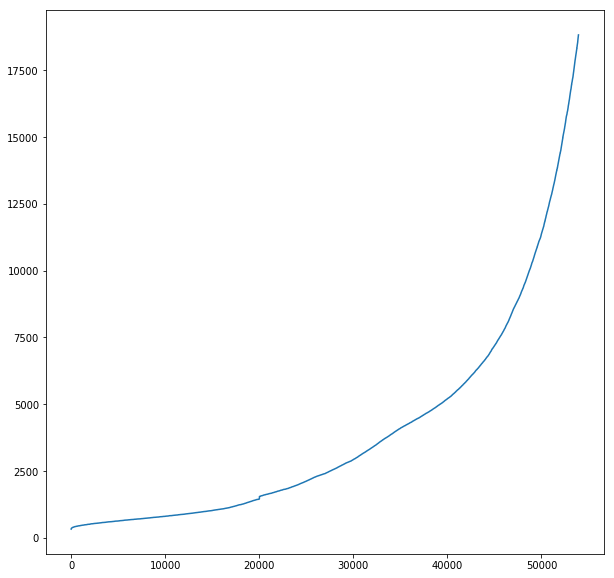

In [8]:
dataset.sort_values(['price']).price.plot(use_index=False);

In [23]:
for quantile, limit in dataset.price.quantile([0.2, 0.4, 0.6, 0.8]).iteritems():
    print(f'{quantile * 100:.0f}%: {limit:.2f}')

20%: 837.00
40%: 1698.00
60%: 3465.00
80%: 6301.20


In [24]:
price_category_labels = [
    'Menos de 1000', 
    'Entre 1000 y 3000', 
    'Entre 3000 y 6000', 
    'Entre 6000 y 10000', 
    'Más de 10000'
]
price_limits = [0, 1000, 3000, 6000, 10000, 20000]

dataset['price_category'] = pd.cut(dataset.price, price_limits, labels=price_category_labels)

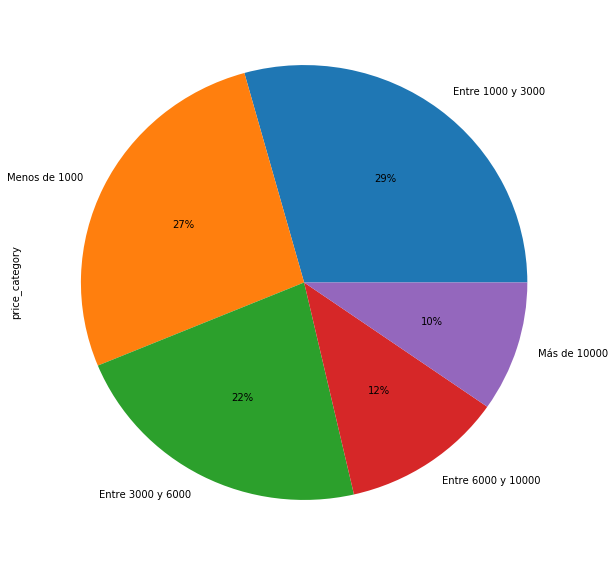

In [27]:
dataset.price_category.value_counts().plot.pie(autopct='%1.0f%%');

# Análisis detallado de variables

## Quilates

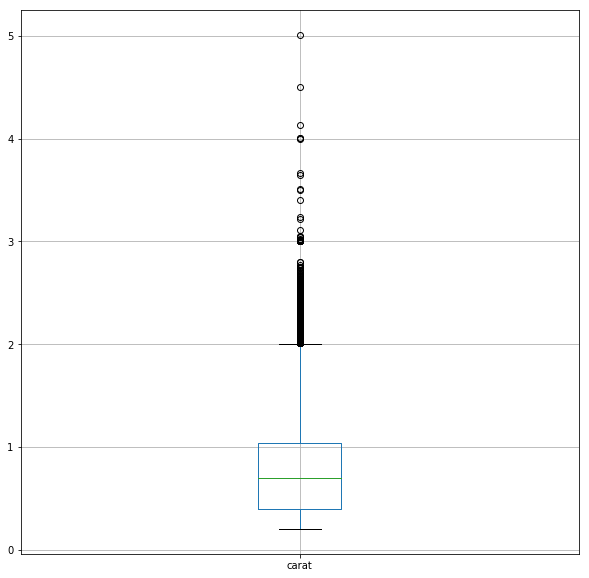

In [41]:
_, data = dataset.boxplot(column=['carat'], return_type='both');

In [72]:
outliers = len(data['fliers'][0].get_xdata())
print(f'Cantidad de valores atípicos: {outliers}')
print(f'Porcentaje de valores atípicos: {outliers / dataset.shape[0] * 100:.2f}%')

Cantidad de valores atípicos: 1889
Porcentaje de valores atípicos: 3.50%
